In [1]:
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, scale
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'C:\\Users\\Peter\\Desktop\\Thinkful\\Thinkful-Lessons\\Thinkful 3.6\\airline2008.csv'
df = pd.read_csv(path)

In [3]:
print(100 * df.isnull().sum()/len(df))#identify columns in data that are null

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.943670
CRSDepTime            0.000000
ArrTime               2.163408
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               1.189276
ActualElapsedTime     2.206919
CRSElapsedTime        0.012040
AirTime               2.206919
ArrDelay              2.206919
DepDelay              1.943670
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                2.163408
TaxiOut               1.955254
Cancelled             0.000000
CancellationCode     98.039382
Diverted              0.000000
CarrierDelay         78.248300
WeatherDelay         78.248300
NASDelay             78.248300
SecurityDelay        78.248300
LateAircraftDelay    78.248300
dtype: float64


In [4]:
df['DepTime'].fillna(df.DepTime.mean(), inplace = True)
if 'TailNum' in df.columns: del df['TailNum']
if 'CarrierDelay' in df.columns:df['CarrierDelay'].fillna(0, inplace = True)
if 'CarrierDelay' in df.columns:df['WeatherDelay'].fillna(0, inplace = True)
if 'CarrierDelay' in df.columns:df['NASDelay'].fillna(0, inplace = True)
if 'CarrierDelay' in df.columns:df['SecurityDelay'].fillna(0, inplace = True)
if 'CarrierDelay' in df.columns:df['LateAircraftDelay'].fillna(0, inplace = True)
if 'CarrierDelay' in df.columns:
    df['TotalDelay'] = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay']
if 'CarrierDelay' in df.columns: del df['CarrierDelay']
if 'WeatherDelay' in df.columns: del df['WeatherDelay']
if 'NASDelay' in df.columns: del df['NASDelay']
if 'SecurityDelay' in df.columns: del df['SecurityDelay']    
if 'LateAircraftDelay' in df.columns: del df['LateAircraftDelay']   
if 'UniqueCarrier' in df.columns: del df['UniqueCarrier']
if 'CancellationCode' in df.columns: del df['CancellationCode']
if 'FlightNum' in df.columns: del df['FlightNum']
if 'Origin' in df.columns: del df['Origin']
if 'Dest' in df.columns: del df['Dest']
if 'Year' in df.columns: del df['Year']

In [5]:
df = df[df['TotalDelay']>30]

In [6]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'Diverted', 'TotalDelay'],
      dtype='object')

In [7]:
rfc = ensemble.RandomForestRegressor()
Y = df['TotalDelay']


X = df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
        'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'Diverted']]

In [107]:
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
     'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'Diverted']]

In [8]:
cross_val_score(rfc, X, Y, cv = 3)

NameError: name 'X' is not defined

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6)

In [109]:
rfc.fit(X_train, Y_train)
Y_ = rfc.predict(X_test)

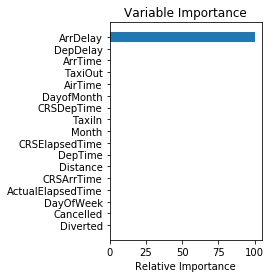

In [110]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

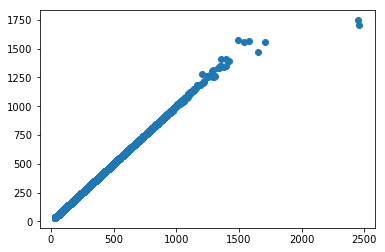

In [111]:
plt.scatter(Y_test, Y_)
plt.show()